In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Stochastic_GMMS_memristor_model.MonteCarlo_S_alpha_rand_core as sa
import pandas as pd
import seaborn as sns

C:\Users\rodri\AppData\Local\Temp\ipykernel_18620\3784670400.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_forward_voltages = pd.read_csv("./only_forward_voltages.csv", names=["data"]) # Valores de SET
df_reverse_voltages = pd.read_csv("./only_reverse_voltages.csv", names=["data"]) # Valores de RESET

In [4]:
df_forward_voltages.head()


,data
0,0.210211
1,0.216356
2,0.244351
3,0.241961
4,0.232402


In [5]:
df_reverse_voltages.head()

,data
0,-0.315208
1,-0.326474
2,-0.319646
3,-0.318622
4,-0.329547


In [6]:
forward_voltages = df_forward_voltages.to_numpy(np.float32)[:,0]
reverse_voltages = df_reverse_voltages.to_numpy(np.float32)[:,0]

In [7]:
fwd_alpha, fwd_beta, fwd_sigma, fwd_miu = sa.S_alpha_identification(forward_voltages)
rvs_alpha, rvs_beta, rvs_sigma, rvs_miu = sa.S_alpha_identification(reverse_voltages)

In [8]:
print("Params obtained forward: Alpha: {} - Beta: {} - Sigma: {} - Mu: {}".format(fwd_alpha, fwd_beta, fwd_sigma, fwd_miu))
print("Params obtained reverse: Alpha: {} - Beta: {} - Sigma: {} - Mu: {}".format(rvs_alpha, rvs_beta, rvs_sigma, rvs_miu))

Params obtained forward: Alpha: 2.0283740059612954 - Beta: 1.5700306280247835 - Sigma: 0.009544230954293544 - Mu: 0.22442348301410675
Params obtained reverse: Alpha: 1.5984653786567347 - Beta: 1.060980431948476 - Sigma: 0.006005868031664833 - Mu: -0.3119162917137146


In [9]:
stochastic_forward_params = sa.S_alpha_noise(len=len(forward_voltages), alpha=round(fwd_alpha, 3), beta=round(fwd_beta, 3), sigma=round(fwd_sigma, 3), mu=round(fwd_miu, 3), max_dev=15.0)
stochastic_reverse_params = sa.S_alpha_noise(len=len(reverse_voltages), alpha=round(rvs_alpha, 3), beta=round(rvs_beta, 3), sigma=round(rvs_sigma, 3), mu=round(rvs_miu, 3), max_dev=15.0)

In [10]:
np.mean(df_forward_voltages)

0.2244235064506784

In [11]:
np.mean(stochastic_forward_params)

0.22939691451798608

In [12]:
forward_similarity = np.dot(forward_voltages, stochastic_forward_params) / (np.linalg.norm(forward_voltages) * np.linalg.norm(stochastic_forward_params))

In [13]:
print("Similitud coseno: {}".format(forward_similarity))

Similitud coseno: 0.9153488287953253


In [14]:
np.mean(df_reverse_voltages)

-0.3119162870945532

In [15]:
np.mean(stochastic_reverse_params)

-0.3110045293089686

In [16]:
reverse_similarity = np.dot(reverse_voltages, stochastic_reverse_params) / (np.linalg.norm(reverse_voltages) * np.linalg.norm(stochastic_reverse_params))

In [17]:
print("Similitud coseno: {}".format(reverse_similarity))

Similitud coseno: 0.9847921183627327


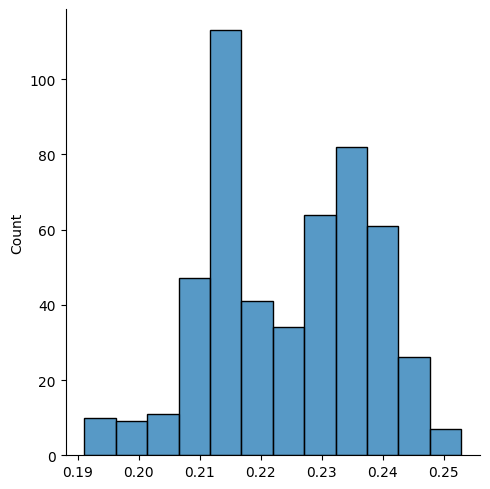

In [18]:
#sns.distplot(a=df_forward_voltages, color='red', hist_kws={"edgecolor": 'white'})
# visualizing plot using matplotlib.pyplot library
#plt.show()
sns.displot(x=forward_voltages)

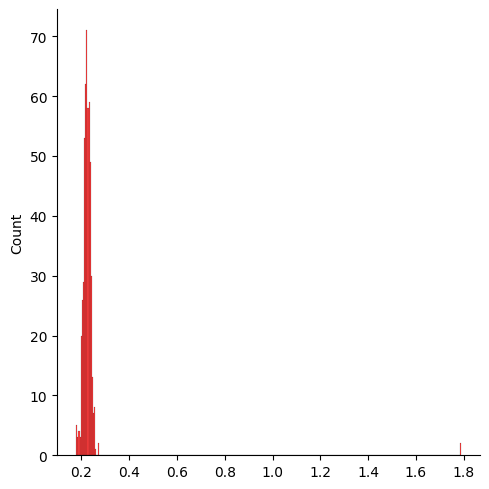

In [19]:
sns.displot(x=stochastic_forward_params, color='red')
plt.show()

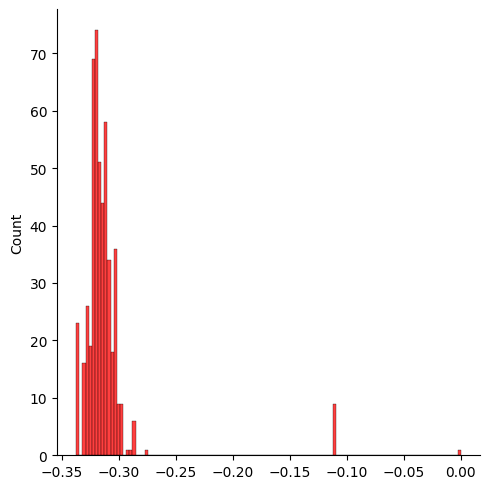

In [20]:
sns.displot(x=reverse_voltages, color='red')
# visualizing plot using matplotlib.pyplot library
plt.show()

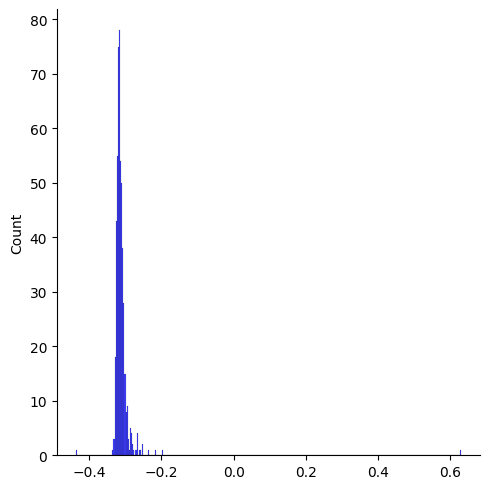

In [21]:
sns.displot(x=stochastic_reverse_params, color='blue')
# visualizing plot using matplotlib.pyplot library
plt.show()

In [32]:
stochastic_merged = np.concatenate([stochastic_forward_params, stochastic_reverse_params]) 

In [41]:
np.random.shuffle(stochastic_merged)

In [42]:
len(stochastic_merged)

1010

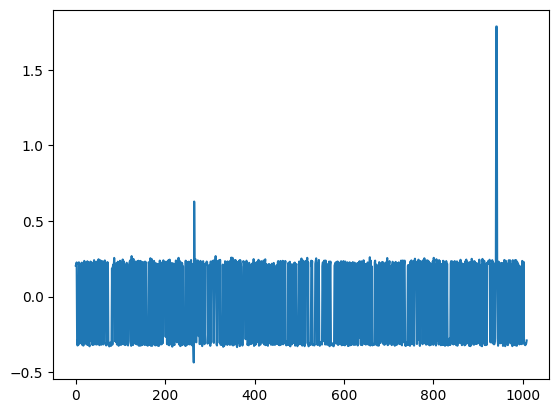

In [43]:
plt.plot(stochastic_merged)

In [44]:
stochastic_current = stochastic_merged / 20_000

In [45]:
len(stochastic_current)

1010

In [48]:
plt.scatter(stochastic_merged, )

TypeError: scatter() missing 1 required positional argument: 'y'